In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/home/neeraj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
colsnorm = ['Number_pregnant','Glucose_concentration','Blood_pressure','Triceps','Insulin','BMI','Pedigree']

In [5]:
data[colsnorm] = data[colsnorm].apply(lambda x : (x - x.min())/(x.max() - x.min()))

In [6]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
ft1 = tf.feature_column.numeric_column('Number_pregnant')
ft2 = tf.feature_column.numeric_column('Glucose_concentration')
ft3 = tf.feature_column.numeric_column('Blood_pressure')
ft4 = tf.feature_column.numeric_column('Triceps')
ft5 = tf.feature_column.numeric_column('Insulin')
ft6 = tf.feature_column.numeric_column('BMI')
ft7 = tf.feature_column.numeric_column('Pedigree')
ft8 = tf.feature_column.numeric_column('Age')

In [8]:
grp = tf.feature_column.categorical_column_with_vocabulary_list('Group' ,['A','B','C','D'])

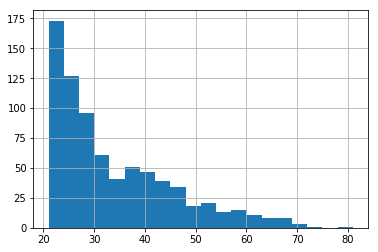

In [9]:
data['Age'].hist(bins = 20)

In [10]:
age_buck = tf.feature_column.bucketized_column(ft8,[10,20,30,40,50,60,70,80])

In [11]:
all_feat = [ft1,ft2,ft3,ft4,ft5,ft6,ft7,grp,age_buck]

In [12]:
X = data.drop('Class',axis =1)
Y = data['Class']

In [13]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,train_size = 0.7)

/home/neeraj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
input_func = tf.estimator.inputs.pandas_input_fn( x = X_train , y = Y_train , batch_size= 10 , num_epochs= 1000 , shuffle = True )

In [15]:
model = tf.estimator.LinearClassifier(all_feat)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxv0k4z0j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9e5441f5c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [16]:
model.train(input_fn=input_func , steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpxv0k4z0j/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 420.242
INFO:tensorflow:loss = 6.424986, step = 101 (0.239 sec)
INFO:tensorflow:global_step/sec: 740.027
INFO:tensorflow:loss = 5.192395, step = 201 (0.135 sec)
INFO:tensorflow:global_step/sec: 682.7
INFO:tensorflow:loss = 5.6521053, step = 301 (0.146 sec)
INFO:tensorflow:global_step/sec: 650.024
INFO:tensorflow:loss = 4.8035593, step = 401 (0.154 sec)
INFO:tensorflow:global_step/sec: 650.397
INFO:tensorflow:loss = 5.964181, step = 501 (0.154 sec)
INFO:tensorflow:global_step/sec: 642.609
INFO:tensorflow:loss = 6.291018, step = 601 (0.155 sec)
INFO:tensorflow:global_step/sec: 583.301
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 535.379
INFO:tensorflow:loss = 4.781204, step = 8101 (0.187 sec)
INFO:tensorflow:global_step/sec: 569.088
INFO:tensorflow:loss = 4.744042, step = 8201 (0.175 sec)
INFO:tensorflow:global_step/sec: 594.727
INFO:tensorflow:loss = 4.8388543, step = 8301 (0.167 sec)
INFO:tensorflow:global_step/sec: 599.954
INFO:tensorflow:loss = 5.6194525, step = 8401 (0.168 sec)
INFO:tensorflow:global_step/sec: 514.913
INFO:tensorflow:loss = 5.1220274, step = 8501 (0.194 sec)
INFO:tensorflow:global_step/sec: 607.859
INFO:tensorflow:loss = 3.56667, step = 8601 (0.165 sec)
INFO:tensorflow:global_step/sec: 604.856
INFO:tensorflow:loss = 6.294882, step = 8701 (0.166 sec)
INFO:tensorflow:global_step/sec: 612.162
INFO:tensorflow:loss = 4.257441, step = 8801 (0.163 sec)
INFO:tensorflow:global_step/sec: 573.97
INFO:tensorflow:loss = 5.2099905, step = 8901 (0.175 sec)
INFO:tensorflow:global_step/sec: 579.176
INFO:tensorflow:loss = 3.7476807, step = 9001 (0.172 sec)
INFO:tensorflow:g

In [35]:
test_func = tf.estimator.inputs.pandas_input_fn( x = X_test , y = Y_test , batch_size= 10 , num_epochs= 1 , shuffle = True )

In [19]:
result = model.evaluate(test_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-25-16:12:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxv0k4z0j/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-25-16:12:55
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.74891776, accuracy_baseline = 0.6363636, auc = 0.8470197, auc_precision_recall = 0.70782244, average_loss = 0.4875574, global_step = 10000, label/mean = 0.36363637, loss = 4.69274, precision = 0.76, prediction/mean = 0.33777475, recall = 0.45238096
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmpxv0k4z0j/model.ckpt-10000


In [20]:
print(result)

{'accuracy': 0.74891776, 'accuracy_baseline': 0.6363636, 'auc': 0.8470197, 'auc_precision_recall': 0.70782244, 'average_loss': 0.4875574, 'label/mean': 0.36363637, 'loss': 4.69274, 'precision': 0.76, 'prediction/mean': 0.33777475, 'recall': 0.45238096, 'global_step': 10000}


In [21]:
test_func = tf.estimator.inputs.pandas_input_fn( x = X_test  , batch_size= 10 , num_epochs= 1 , shuffle = True )

In [22]:
ans = model.predict(test_func)

In [25]:
list(ans)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxv0k4z0j/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.7312499], dtype=float32),
  'logistic': array([0.3249205], dtype=float32),
  'probabilities': array([0.67507946, 0.32492048], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.9270227], dtype=float32),
  'logistic': array([0.12708049], dtype=float32),
  'probabilities': array([0.8729195 , 0.12708049], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.6115365], dtype=float32),
  'logistic': array([0.6482912], dtype=float32),
  'probabilities': array([0.35170874, 0.6482912 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-2.0639002], dtype=float32),
  'logistic': array([0.11265536], dtype=float32),
  'probabilities': array([0.8873446 , 0.11265535], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.15001416], dtype=float32),
  'logistic': a

In [26]:
dnn = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns = all_feat , n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmprmf49bus', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9e5294b7b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
embedded = tf.feature_column.embedding_column(grp , dimension=4)

In [28]:
all_feat = [ft1,ft2,ft3,ft4,ft5,ft6,ft7,embedded,age_buck]

In [38]:
dnn = tf.estimator.DNNClassifier(hidden_units=[10,20, 20 , 20 ,10],feature_columns = all_feat , n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2v9c9c2g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9e5404bc88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
dnn.train(input_fn=input_func , steps = 5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp2v9c9c2g/model.ckpt.
INFO:tensorflow:loss = 6.935255, step = 1
INFO:tensorflow:global_step/sec: 321.991
INFO:tensorflow:loss = 7.399041, step = 101 (0.312 sec)
INFO:tensorflow:global_step/sec: 529.702
INFO:tensorflow:loss = 6.1560755, step = 201 (0.190 sec)
INFO:tensorflow:global_step/sec: 610.535
INFO:tensorflow:loss = 5.142849, step = 301 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.829
INFO:tensorflow:loss = 9.32234, step = 401 (0.165 sec)
INFO:tensorflow:global_step/sec: 594.376
INFO:tensorflow:loss = 2.8853624, step = 501 (0.167 sec)
INFO:tensorflow:global_step/sec: 603.049
INFO:tensorflow:loss = 3.083971, step = 601 (0.168 sec)
INFO:tensorflow:global_step/sec: 591.369
INFO:tensorflow:loss =

In [40]:
evall = dnn.evaluate(test_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-25-16:24:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2v9c9c2g/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-25-16:24:07
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.74458873, accuracy_baseline = 0.6363636, auc = 0.82636863, auc_precision_recall = 0.68093187, average_loss = 0.5935051, global_step = 5000, label/mean = 0.36363637, loss = 5.7124863, precision = 0.6984127, prediction/mean = 0.30856603, recall = 0.52380955
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp2v9c9c2g/model.ckpt-5000


In [41]:
evall

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.6363636,
 'auc': 0.82636863,
 'auc_precision_recall': 0.68093187,
 'average_loss': 0.5935051,
 'label/mean': 0.36363637,
 'loss': 5.7124863,
 'precision': 0.6984127,
 'prediction/mean': 0.30856603,
 'recall': 0.52380955,
 'global_step': 5000}

In [ ]:
dnn.